In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
    .config("spark.driver.memory", "8g")\
    .getOrCreate()

spark

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyspark.sql.functions as F
import pyspark.sql.types as T

from pyspark.sql.window import Window
from pyspark.sql.functions import col, lit

from common import *

pd.set_option('display.max_rows', 100)


# Server view

## By config

In [10]:
PREFIX = "main/tpcc-scuffed"
CASES = {
    "baseline": events_throughput(spark, f"{PREFIX}/baseline-clients37", sample=5).toPandas(),
#     "ddr_ts": events_throughput(spark, f"{PREFIX}/ddr_ts-clients37", sample=5).toPandas(),
}

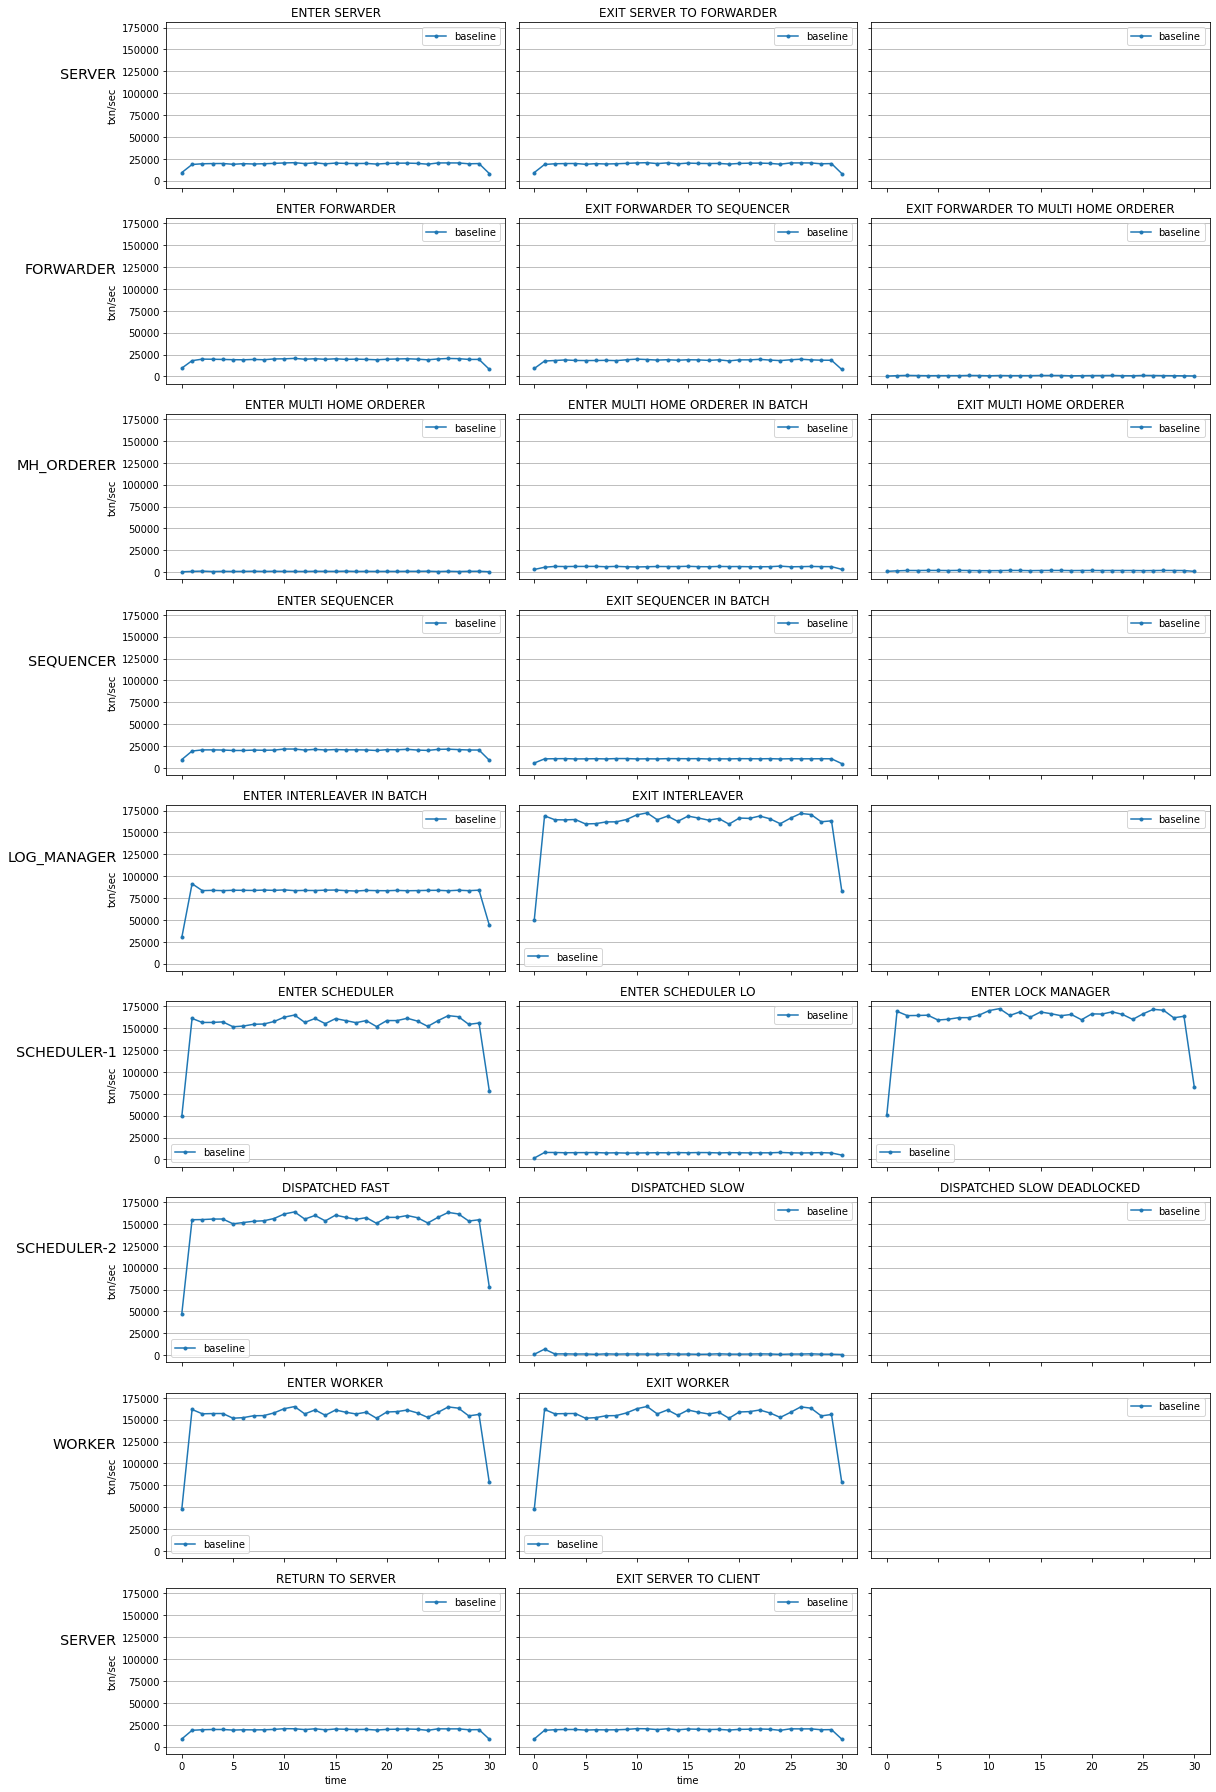

In [12]:
plot_event_throughput(CASES)
plt.tight_layout()

## By region

In [6]:
PREFIX = "main/tpcc"

baseline_df = events_throughput(spark, f"{PREFIX}/baseline-clients37", sample=5, per_machine=True).toPandas()
# ddr_ts_df = events_throughput(spark, f"{PREFIX}/ddr_ts-clients37", sample=5, per_machine=True).toPandas()

regions = np.unique(np.concatenate([
    baseline_df["replica"].unique(),
    ddr_ts_df["replica"].unique(),
]))

CASES = {}
for i in regions:
    CASES[f"baseline_{i}"] = baseline_df.loc[baseline_df.replica == i]
    CASES[f"ddr_ts_{i}"] = ddr_ts_df.loc[ddr_ts_df.replica == i]

NameError: name 'ddr_ts_df' is not defined

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


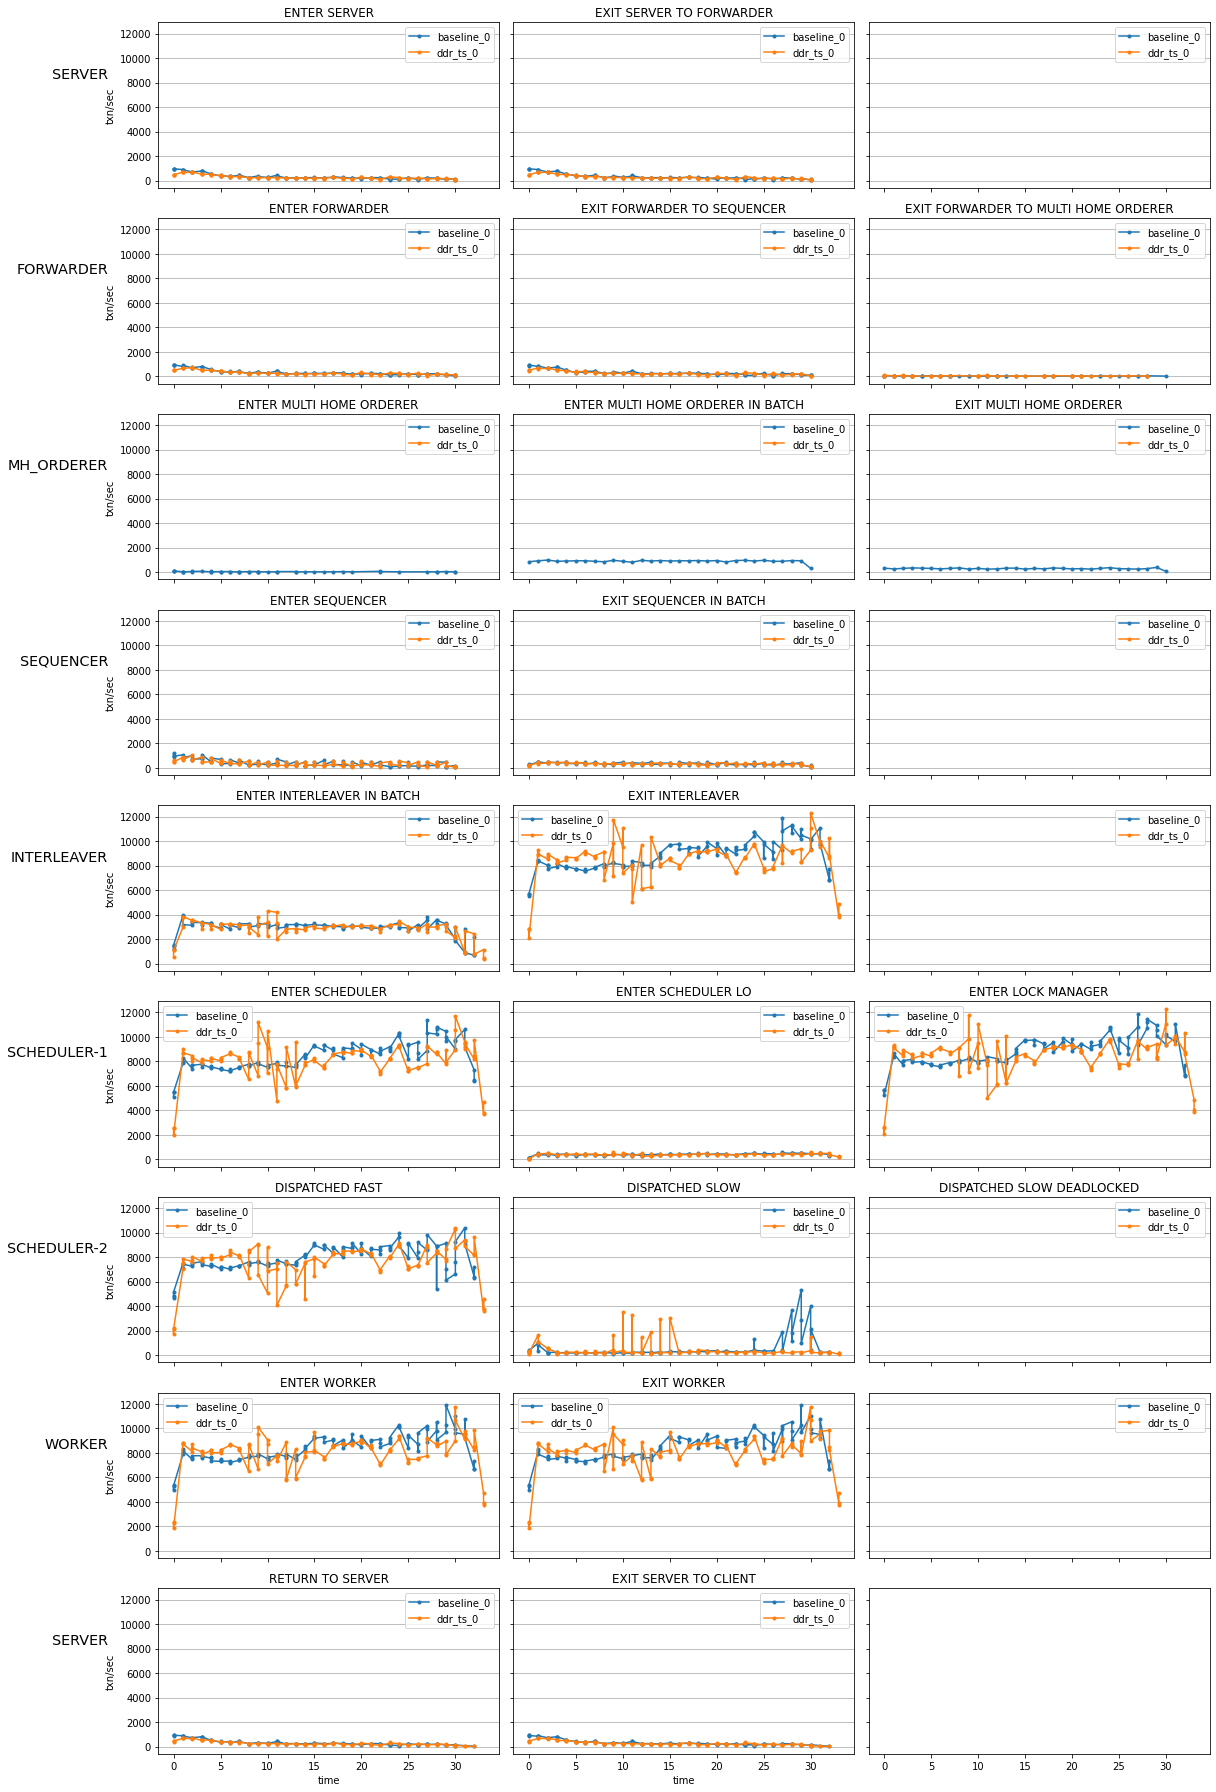

In [7]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("0")
})
plt.tight_layout()

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


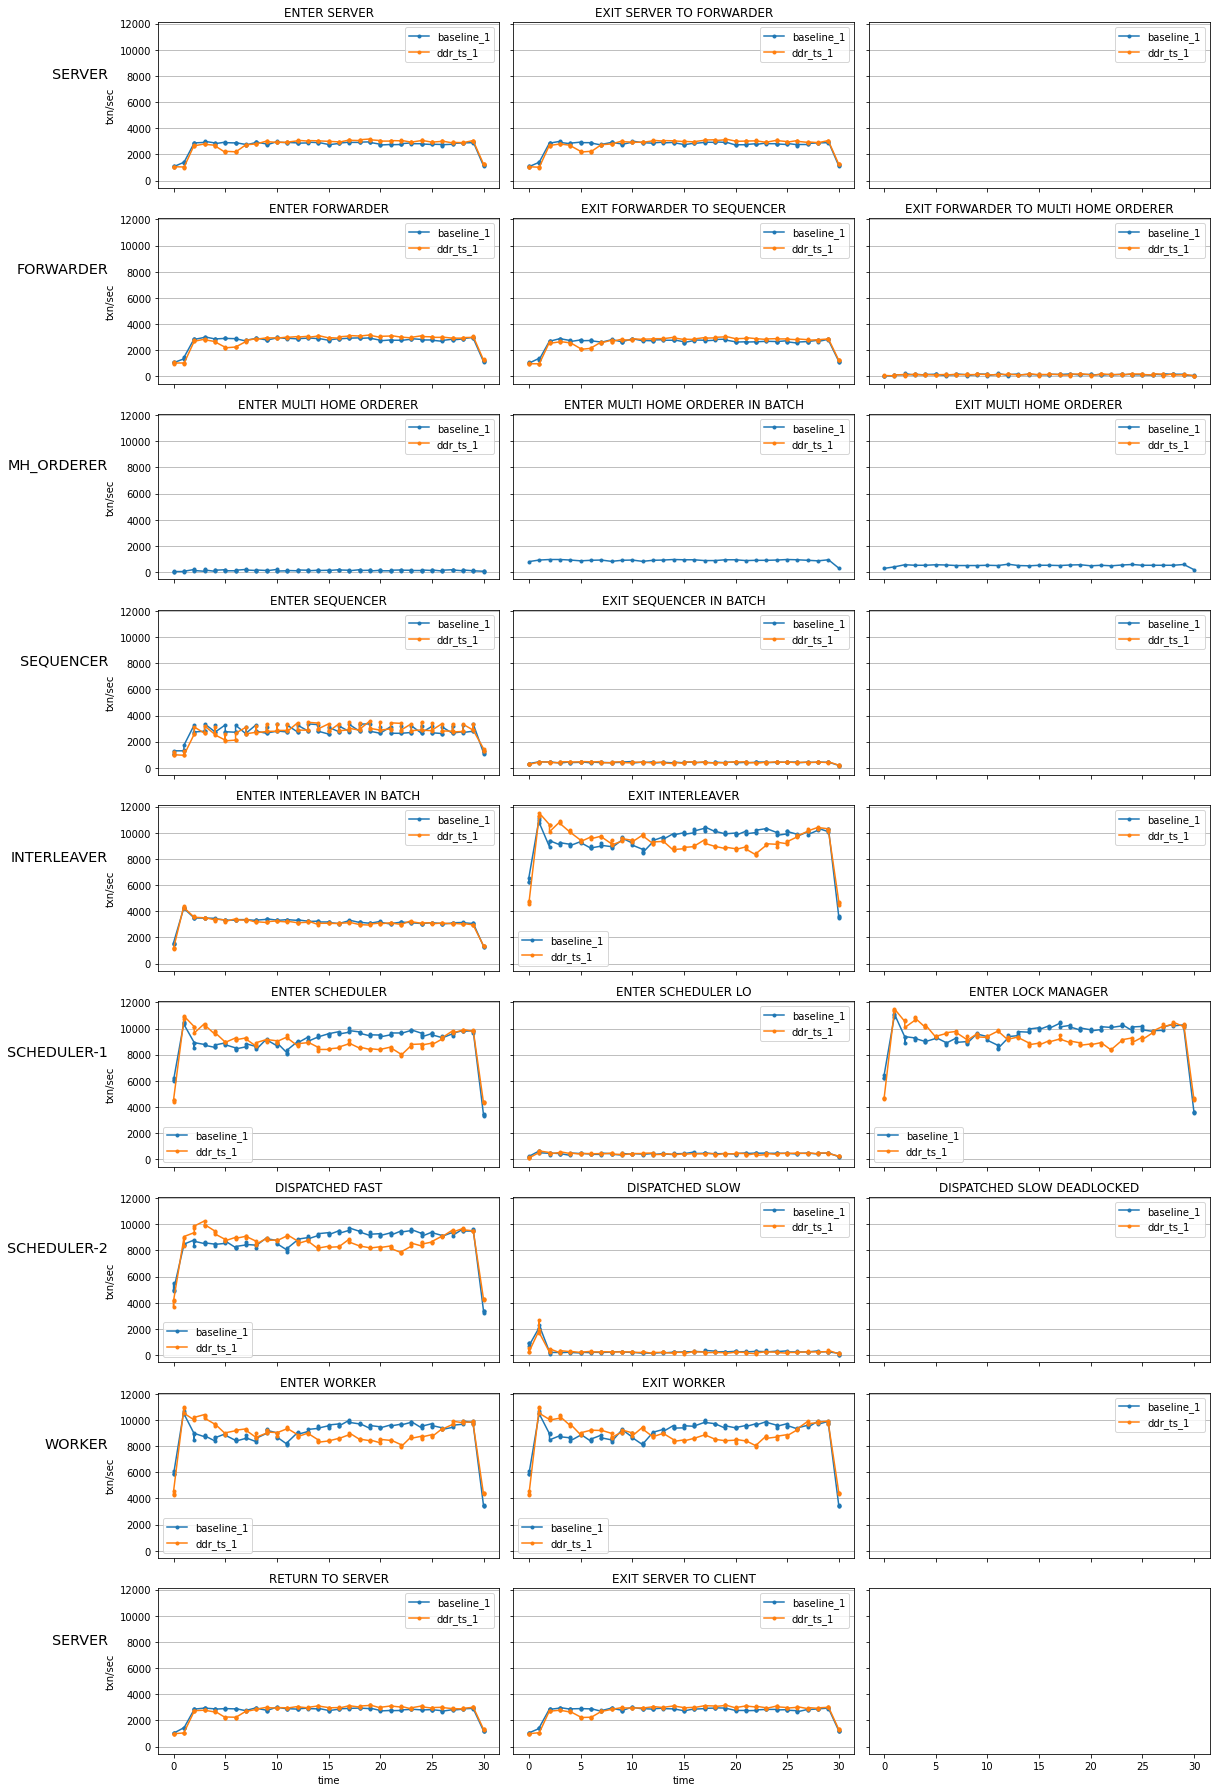

In [8]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("1")
})
plt.tight_layout()

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


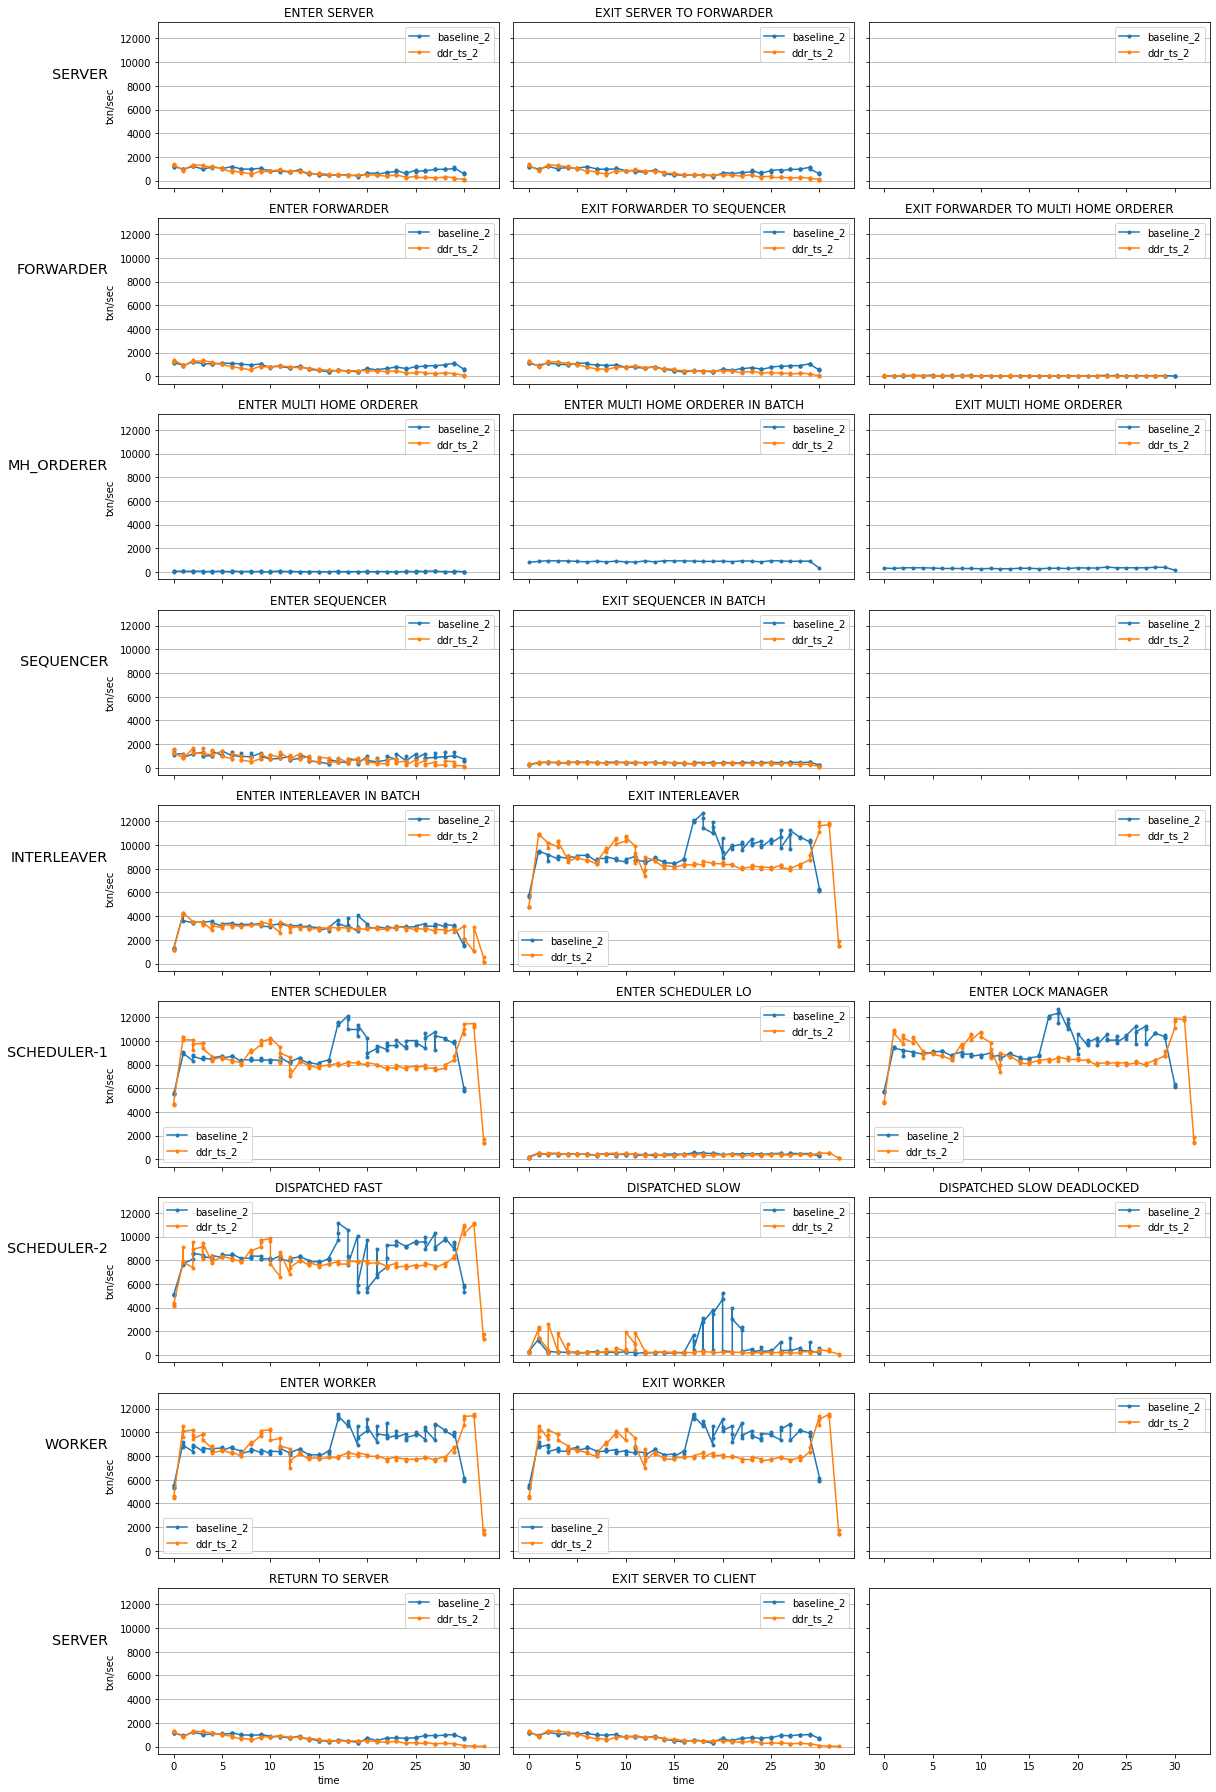

In [9]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("2")
})
plt.tight_layout()

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


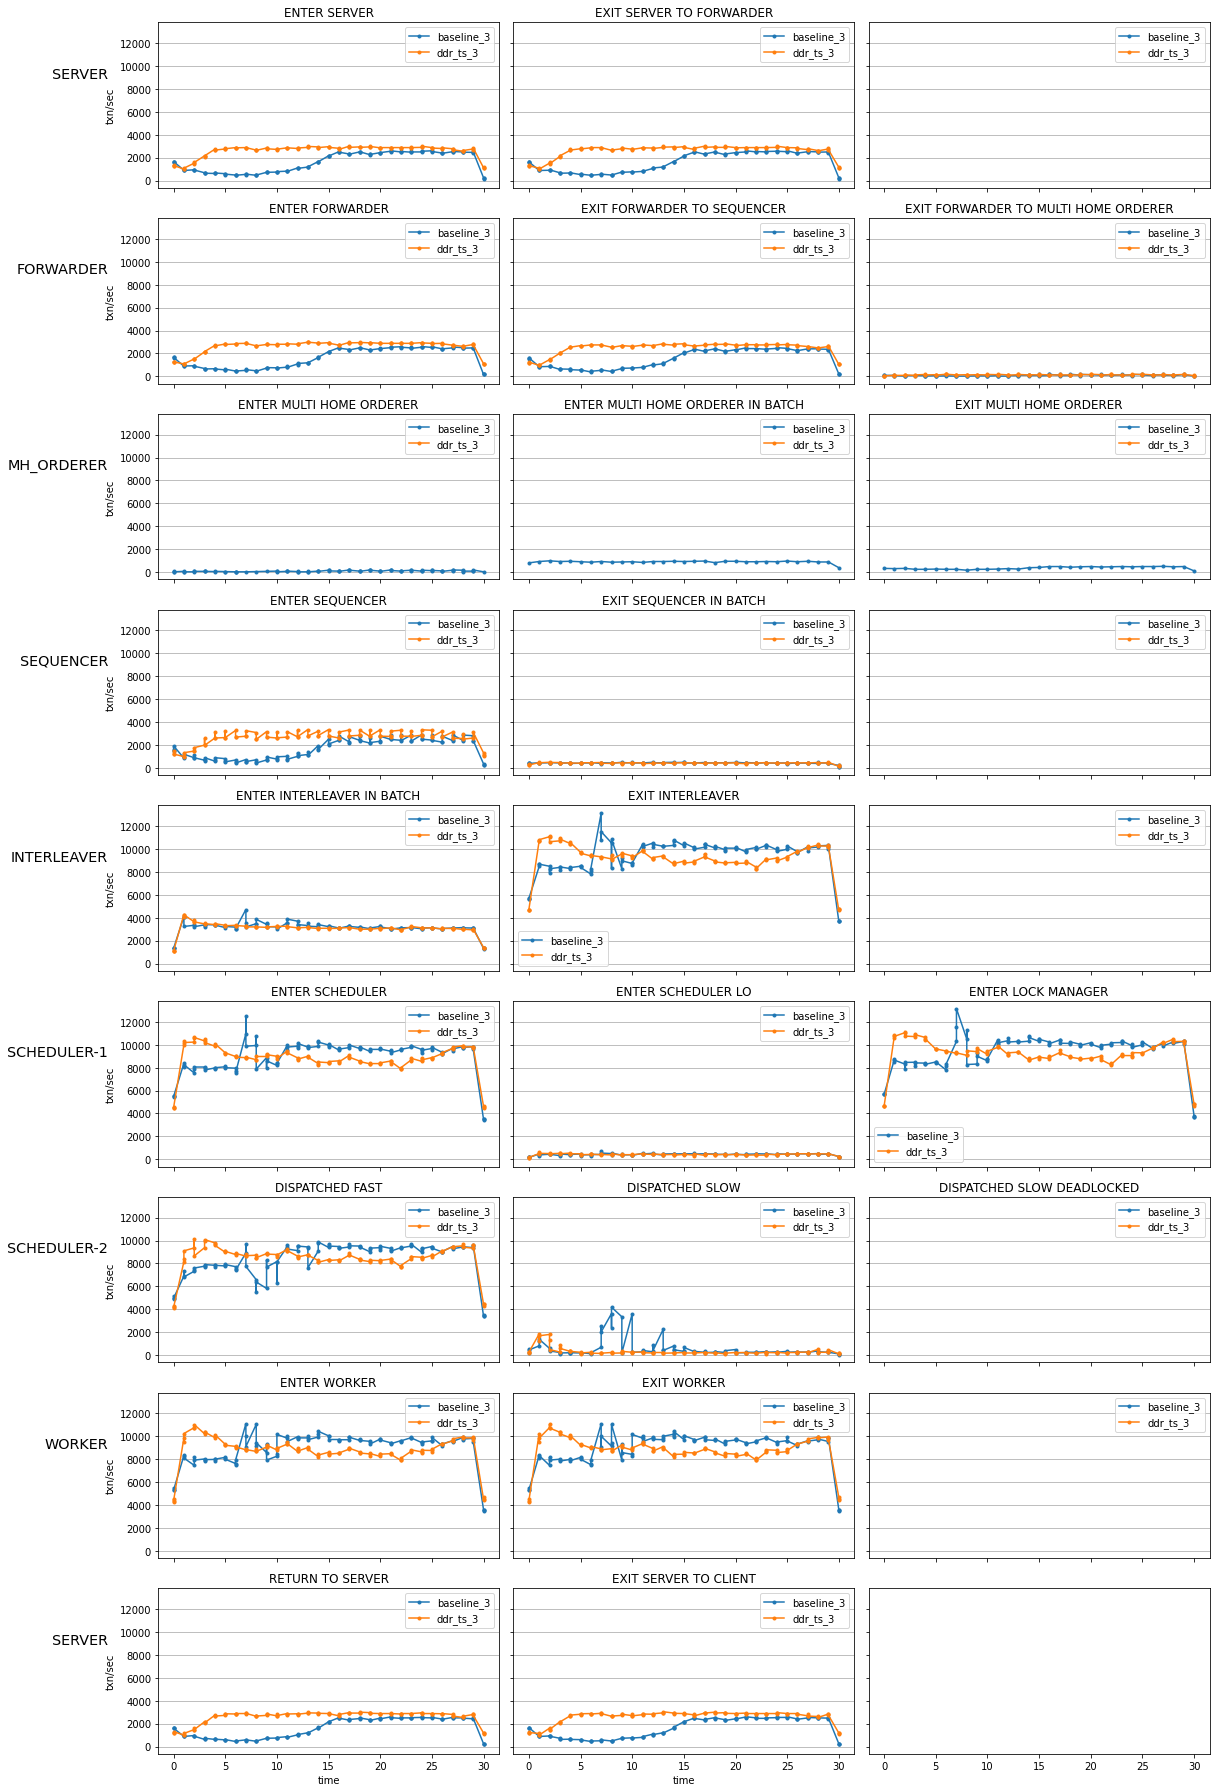

In [10]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("3")
})
plt.tight_layout()

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


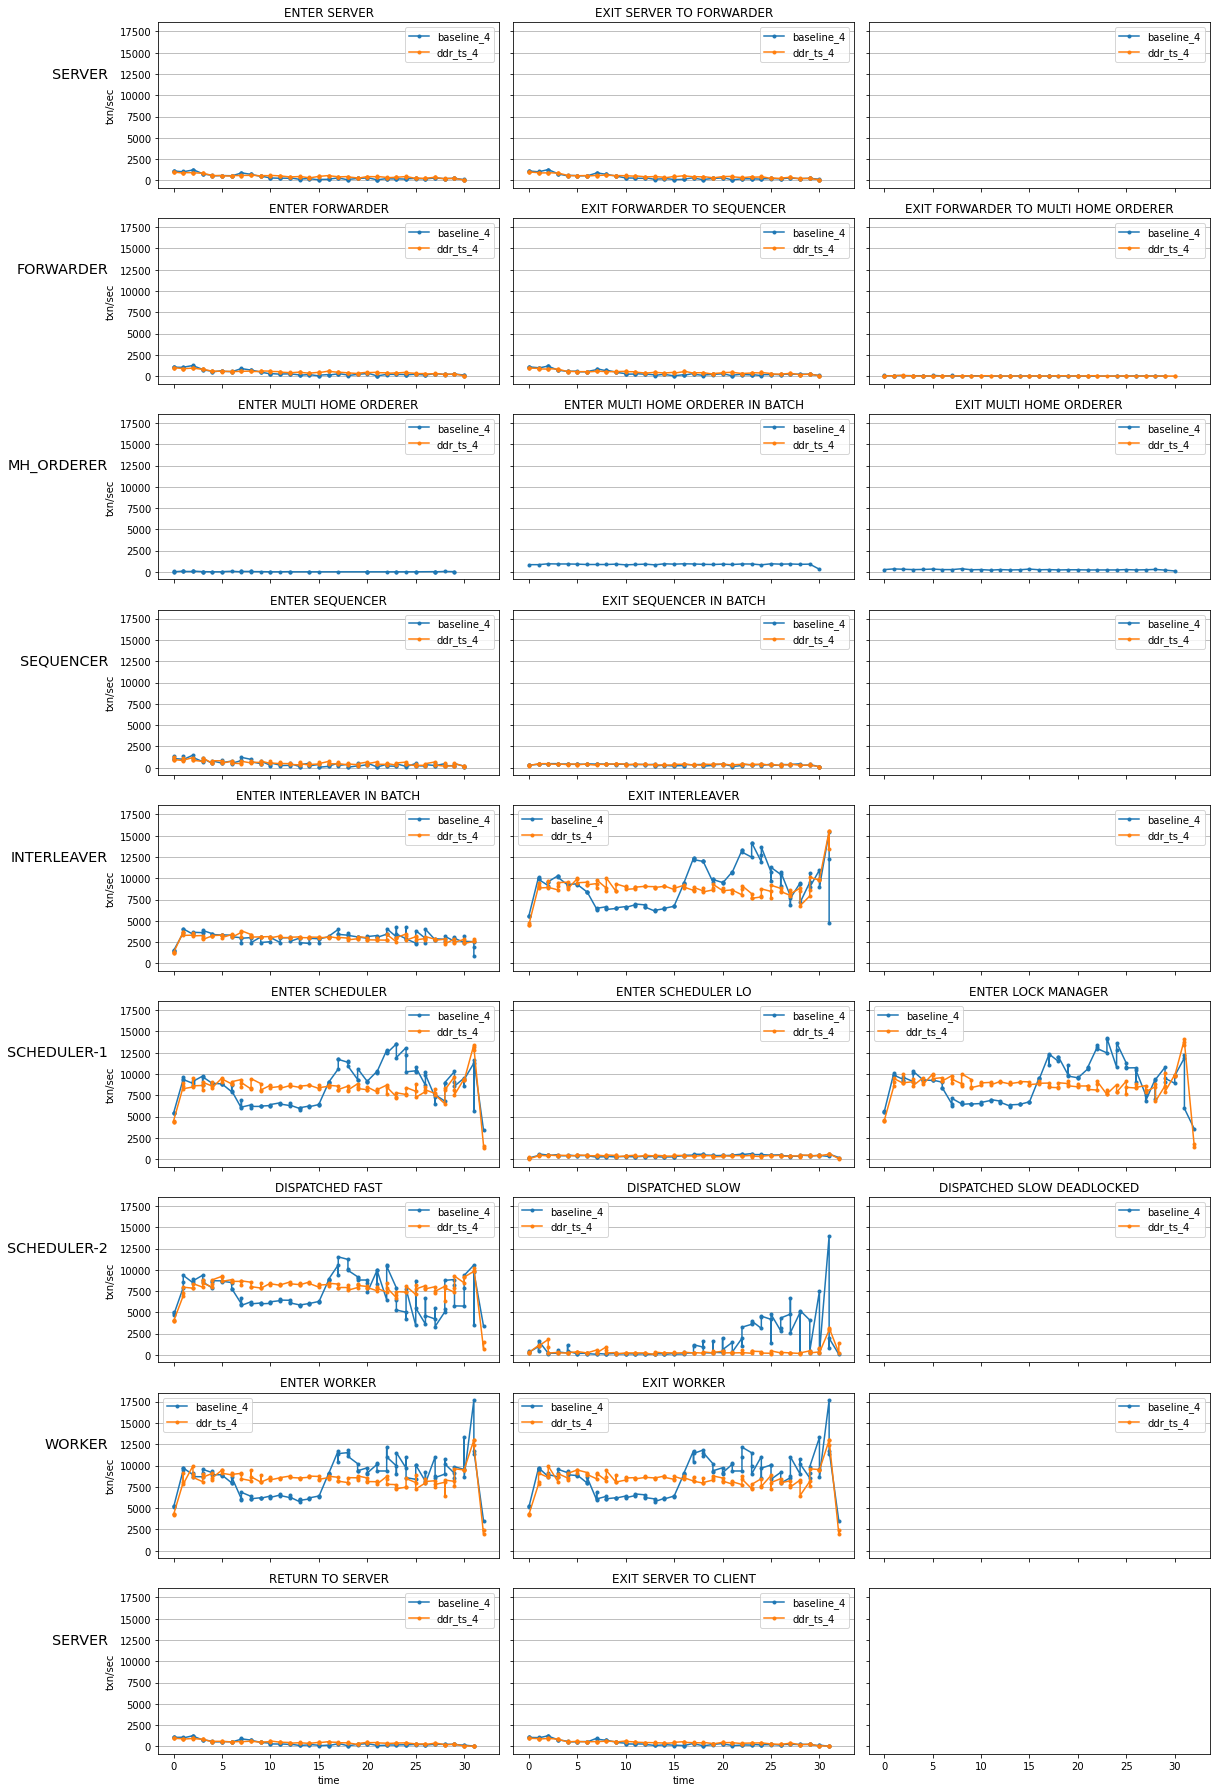

In [11]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("4")
})
plt.tight_layout()

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


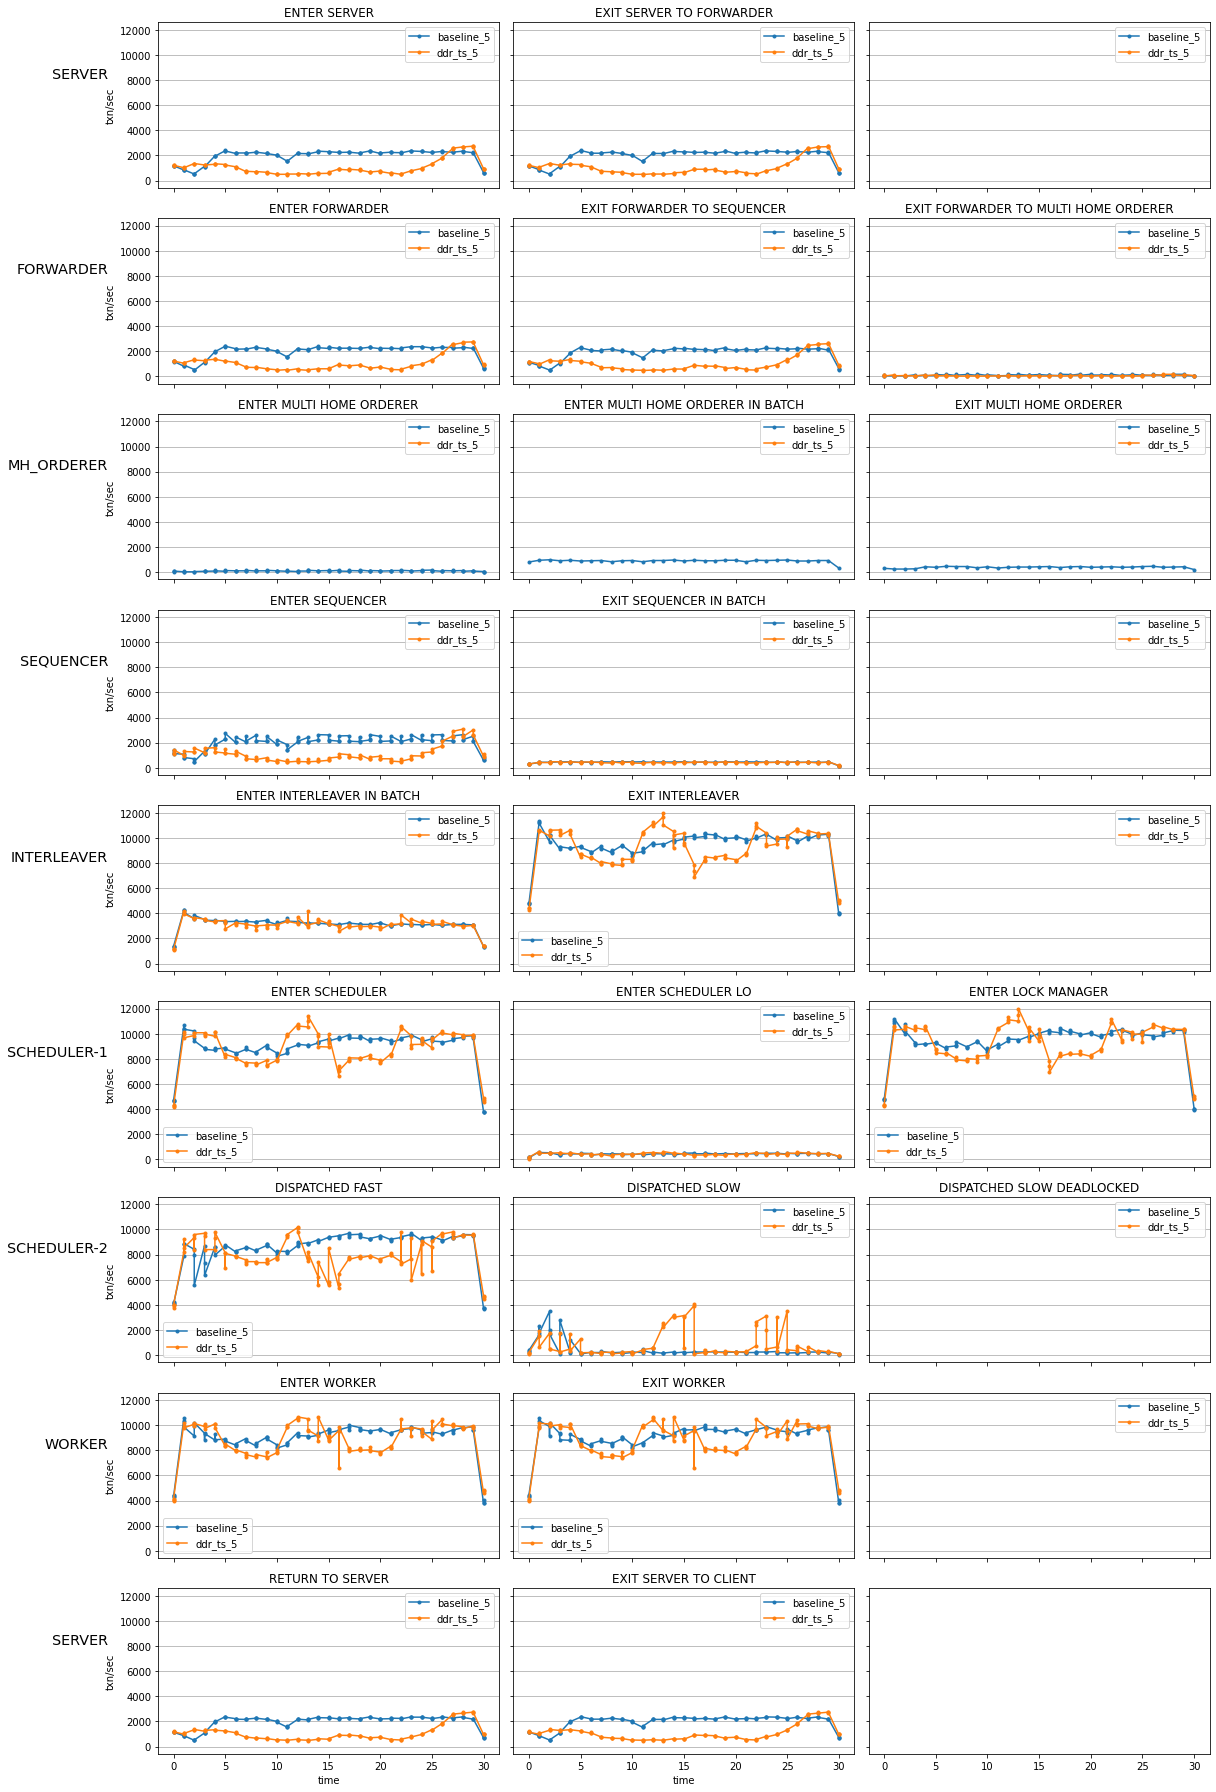

In [12]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("5")
})
plt.tight_layout()

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


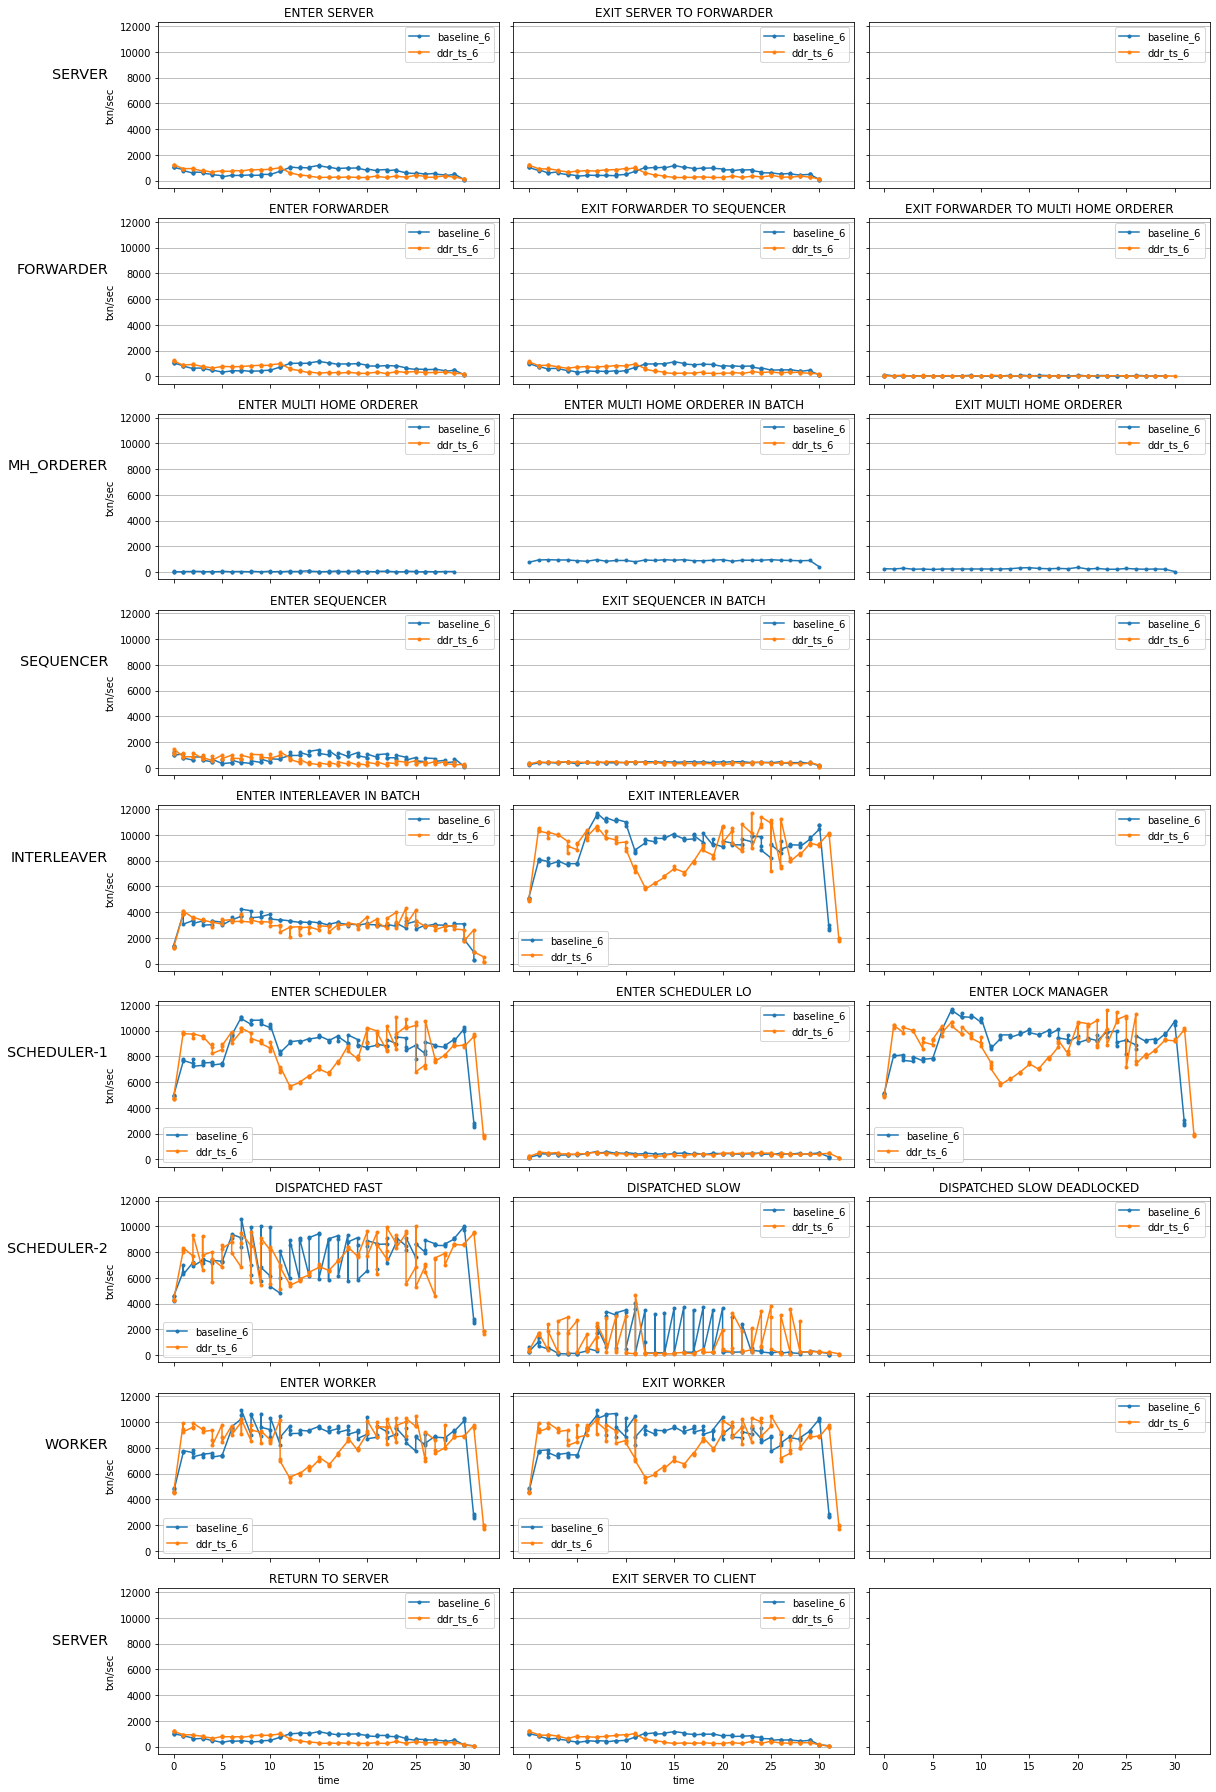

In [13]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("6")
})
plt.tight_layout()

/home/ctring/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


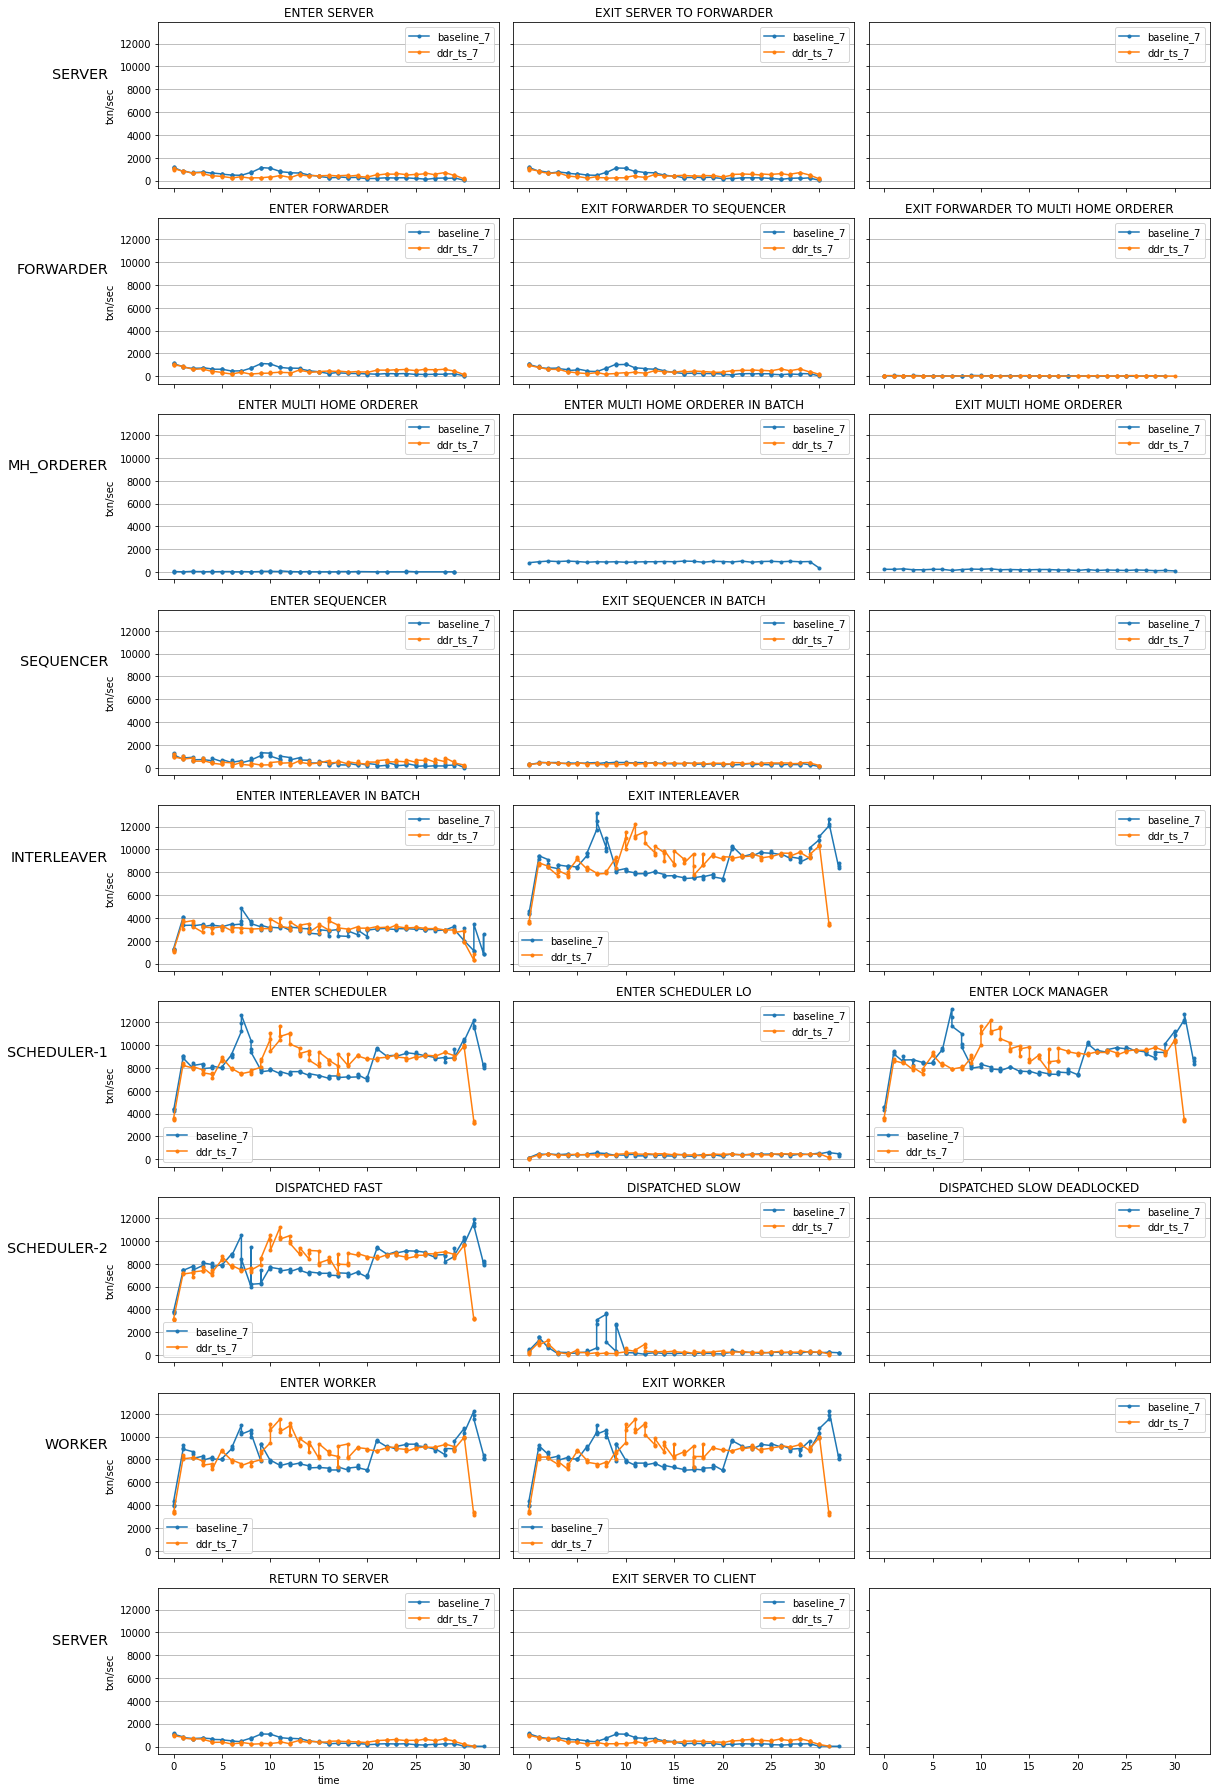

In [14]:
plot_event_throughput({
    k: CASES[k] for k in CASES if k.endswith("7")
})
plt.tight_layout()

## By machine

In [ ]:
PREFIX = "main/tpcc"

baseline_df = events_throughput(spark, f"{PREFIX}/baseline-clients100", per_machine=True).toPandas()
ddr_ts_df = events_throughput(spark, f"{PREFIX}/ddr_ts-clients100", per_machine=True).toPandas()


CASES = {
    "ddr_ts_0_0": ddr_ts_df.loc[(ddr_ts_df.replica == 0) & (ddr_ts_df.partition == 0)],
    "ddr_ts_0_1": ddr_ts_df.loc[(ddr_ts_df.replica == 0) & (ddr_ts_df.partition == 1)],
    "ddr_ts_0_2": ddr_ts_df.loc[(ddr_ts_df.replica == 0) & (ddr_ts_df.partition == 2)],
}

In [ ]:
plot_event_throughput(CASES)
plt.tight_layout()

# Client view

In [19]:
PREFIX = "main/tpcc/ddr_ts-clients125"
SAMPLE = 100

transactions_sdf = transactions_csv(spark, PREFIX, 0, 0)\
        .withColumn("time", (col("received_at") / 1000000000).cast(T.IntegerType()))

throughput_over_time_df = transactions_sdf\
        .groupBy("time")\
        .agg(
            (
                F.count("time") * (100/SAMPLE)
            ).alias("throughput")
        )\
        .toPandas()

throughput_over_time_df.sort_values("time", inplace=True)
throughput_over_time_df.loc[:, "time"] = normalize(throughput_over_time_df["time"])

<AxesSubplot:xlabel='time'>

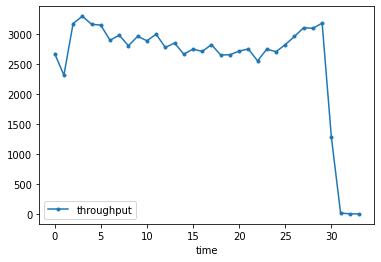

In [20]:
throughput_over_time_df.plot(x="time", y="throughput", marker='.')

In [97]:
PREFIX = "quick/tpcc-test/ddr_ts-duration30mh_zipf0"
SAMPLE = 100

transactions_sdf = transactions_csv(spark, PREFIX, 0, 0)\
        .withColumn("time", (col("received_at") / 1000000000).cast(T.IntegerType()))

throughput_over_time_df = transactions_sdf\
        .groupBy("time")\
        .agg(
            (
                F.count("time") * (100/SAMPLE)
            ).alias("throughput")
        )\
        .toPandas()

throughput_over_time_df.sort_values("time", inplace=True)
throughput_over_time_df.loc[:, "time"] = normalize(throughput_over_time_df["time"])